## Decision Tree:

A decision tree is a machine learning algorithm used in both classification as well as regression tasks. The main aim of a decision tree is to obtain pure subsets of the dataframe using the independent variables in the shortest way possible. Prediction is then done on new samples of the data.Though decision trees are extensively used they are prone to overfitting.
In other word we recursively partitioned the data till we reach teh final leaf node, This is doen using two methods:

    1.GINI INDEX
    2.Entropy
    
To know more about [decision trees]:(https://blog.quantinsti.com/gini-index/#Splitting-measures)
    
    
    

## Decision Trees Classifier:

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt


C:\Users\ronal\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ronal\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\ronal\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [70]:
##loading the necessary dataset
titanic=pd.read_csv(r'D:\BDA 2020 assignments\py-master\ML\9_decision_tree\Exercise\titanic.csv',usecols=['Survived', 'Pclass', 'Sex', 'Age', 'Fare'])

In [71]:
titanic.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [72]:
titanic.shape

(891, 5)

In [73]:
titanic.columns ##"survived" is our target variable,Pclass,Sex,Age,Fare-predictor variables

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare'], dtype='object')

In [74]:
titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

In [75]:
titanic.dropna(inplace=True)

In [76]:
predictor=titanic[['Pclass','Fare','Sex','Age']]
target=titanic.Survived

In [77]:
predictor

,Pclass,Fare,Sex,Age
0,3,7.2500,male,22.0
1,1,71.2833,female,38.0
2,3,7.9250,female,26.0
3,1,53.1000,female,35.0
4,3,8.0500,male,35.0
...,...,...,...,...
885,3,29.1250,female,39.0
886,2,13.0000,male,27.0
887,1,30.0000,female,19.0
889,1,30.0000,male,26.0


In [78]:
target

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 714, dtype: int64

In [79]:
## convert the labels in the sex column into number
from sklearn.preprocessing import LabelEncoder
le_sex=LabelEncoder()

In [81]:
predictor['sex_n']=le_sex.fit_transform(predictor['Sex'])

In [87]:
predictor.drop(['Sex'],axis='columns',inplace=True)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

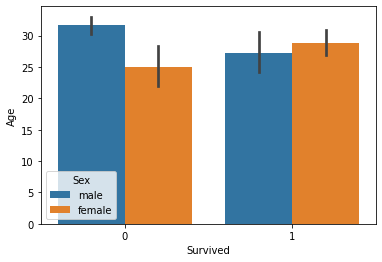

In [92]:
##visualise the effects of different predictor varibles on survived column not male=1 and female=0
import seaborn as sbn
sbn.barplot(x='Survived',y='Age',data=titanic,hue='Sex')


In [93]:
## splitting the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(predictor,target,test_size=0.2)

In [95]:
x_train.shape

(571, 4)

In [96]:
len(y_train)

571

In [97]:
## build a decision tree model
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [100]:
ypredicted=model.predict(x_test)

In [101]:
model.score(x_test,y_test)

0.7482517482517482

## SVM

### SVM:
    A support vector machine (SVM) is a supervised machine learning model that uses classification algorithms for two-group classification problems. After giving an SVM model sets of labeled training data for each category, they’re able to categorize new text.Compared to newer algorithms like neural networks, they have two main advantages: higher speed and better performance with a limited number of samples (in the thousands). This makes the algorithm very suitable for text classification problems, where it’s common to have access to a dataset of at most a couple of thousands of tagged samples.

In [120]:
from sklearn.datasets import load_digits

In [121]:
digits=load_digits()

In [122]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [123]:
digits_frame=pd.DataFrame(digits.data,columns=digits.feature_names)

In [124]:
digits_frame

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [126]:
digits_frame['target']=digits.target

In [127]:
digits_frame.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [141]:
import matplotlib.pyplot as plt
df1=digits_frame[digits_frame.target==1]
df5=digits_frame[digits_frame.target==5]
df3=digits_frame[digits_frame.target==3]

In [131]:
df1.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
11,0.0,0.0,0.0,0.0,14.0,13.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,13.0,16.0,1.0,0.0,1
21,0.0,0.0,0.0,2.0,16.0,16.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,12.0,15.0,4.0,0.0,1
42,0.0,0.0,0.0,0.0,12.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,16.0,8.0,0.0,0.0,1
47,0.0,0.0,0.0,1.0,11.0,9.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,14.0,6.0,0.0,0.0,1


In [134]:
df5.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
5,0.0,0.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,9.0,16.0,16.0,10.0,0.0,0.0,5
15,0.0,5.0,12.0,13.0,16.0,16.0,2.0,0.0,0.0,11.0,...,0.0,0.0,4.0,15.0,16.0,2.0,0.0,0.0,0.0,5
25,0.0,0.0,12.0,8.0,8.0,7.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,11.0,14.0,9.0,0.0,0.0,0.0,5
32,0.0,2.0,13.0,16.0,16.0,16.0,11.0,0.0,0.0,5.0,...,0.0,0.0,2.0,16.0,15.0,8.0,0.0,0.0,0.0,5
33,0.0,6.0,13.0,5.0,8.0,8.0,1.0,0.0,0.0,8.0,...,0.0,0.0,4.0,16.0,15.0,3.0,0.0,0.0,0.0,5


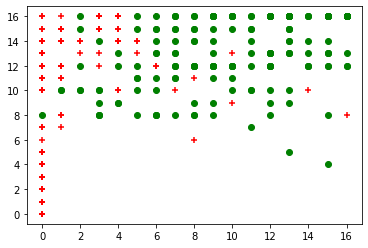

In [142]:
plt.scatter(df1['pixel_0_2'],df1['pixel_0_3'],color='red',marker='+')
plt.scatter(df5['pixel_0_2'],df5['pixel_0_3'],color='green',marker='o')

## Looks like SVM will have a tough time classifying the test data let's try

In [146]:
## predictor and target variables
predictor=digits_frame.drop(['target'],axis='columns')
predictor

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [144]:
target=digits_frame.target

In [145]:
target

array([0, 1, 2, ..., 8, 9, 8])

In [147]:
## splitting the dataset into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(predictor,target,test_size=0.2)

In [149]:
x_train.shape

(1437, 64)

In [152]:
len(x_test)

360

In [153]:
## train svm model and find the acuracy tweaking different parameter
from sklearn.svm import SVC
model=SVC()

In [154]:
model.fit(x_train,y_train,)

SVC()

In [155]:
model.score(x_test,y_test)

0.9861111111111112

In [157]:
y_pred=model.predict(x_test)

In [158]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_pred,y_test)

Text(33.0, 0.5, 'actual')

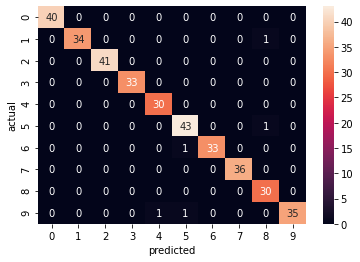

In [161]:
import seaborn as sbn
sbn.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('actual')